
Logistic Regression Results:
Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78


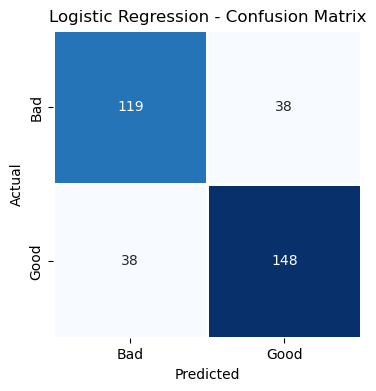

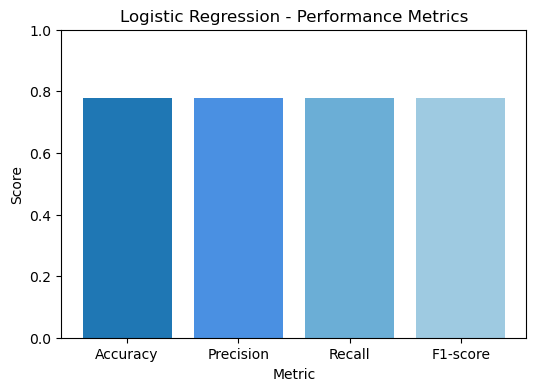

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
file_path = (r"C:\Users\KIIT\Downloads\archive (3)\WineQT.csv")
df = pd.read_csv(file_path)

# Convert quality to binary classification: Good (>=6) and Bad (<6)
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Split features and target
X = df.drop(columns=["quality"])
y = df["quality"]

# Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# 🔹 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", linewidths=1, square=True,
            xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"], cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🔹 Performance Metrics Bar Graph
metrics = [accuracy, precision, recall, f1]
metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
colors = ["#1f77b4", "#4a90e2", "#6baed6", "#9ecae1"]  # Different shades of blue

plt.figure(figsize=(6, 4))
plt.bar(metrics_names, metrics, color=colors)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Logistic Regression - Performance Metrics")
plt.show()


In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results to CSV
model_name = "Logistic Regression"  # Change this to the actual model name
df_results = pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1-score": [f1]})
df_results.to_csv(f"{model_name}_results.csv", index=False)
